## Ejemplo Sencillo del algoritmo de arbol de decision 

## Se utiliza un dataset donde muestra el uso de internet segun sexo, edad y nivel de estudios

In [93]:
import pandas as pd

### Cargamos Datos

In [94]:
#creamos el dataframe e importamos el csv
df = pd.read_csv('uso_internet_ejemplo.csv')

In [95]:
df.head()

,Unnamed: 0,uso_internet,sexo,edad,estudios
0,1,0,Mujer,66,Primaria
1,2,1,Hombre,72,Primaria
2,3,1,Hombre,48,Medios universitarios
3,4,0,Hombre,59,Superiores
4,5,1,Mujer,44,Superiores


In [96]:
# Pasamos a eliminar la columna 'Unnamed: 0'
df = df.drop(columns = 'Unnamed: 0')

In [97]:
df

,uso_internet,sexo,edad,estudios
0,0,Mujer,66,Primaria
1,1,Hombre,72,Primaria
2,1,Hombre,48,Medios universitarios
3,0,Hombre,59,Superiores
4,1,Mujer,44,Superiores
...,...,...,...,...
2450,1,Hombre,43,Primaria
2451,1,Mujer,18,Secundaria
2452,0,Mujer,54,Primaria
2453,1,Hombre,31,Secundaria


In [98]:
# Convertimos las variables categoricas(strings) a binarias
df = pd.get_dummies(data = df, drop_first = True)
df

,uso_internet,edad,sexo_Mujer,estudios_Medios universitarios,estudios_Primaria,estudios_Secundaria,estudios_Sin estudios,estudios_Superiores
0,0,66,1,0,1,0,0,0
1,1,72,0,0,1,0,0,0
2,1,48,0,1,0,0,0,0
3,0,59,0,0,0,0,0,1
4,1,44,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...
2450,1,43,0,0,1,0,0,0
2451,1,18,1,0,0,1,0,0
2452,0,54,1,0,1,0,0,0
2453,1,31,0,0,0,1,0,0


### Seleccionamos variables

In [99]:
# Pasamos a quitar la columna 'uso de internet' y lo guardamos en X
X = df.drop(columns = 'uso_internet')
#guardamos la variable objetivo en y
y = df.uso_internet

### Entrenamos Modelo DecisionTreeClassifier()

In [100]:
#Para eso necesitamos la libreria sklearn
from sklearn.tree import DecisionTreeClassifier

In [101]:
modelo_arbol = DecisionTreeClassifier(max_depth = 3)

In [102]:
modelo_arbol.fit(X = X, y = y)

DecisionTreeClassifier(max_depth=3)

### Visualizacion del arbol de decision

In [103]:
#importamos la funcion para viasualizar el arbol
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

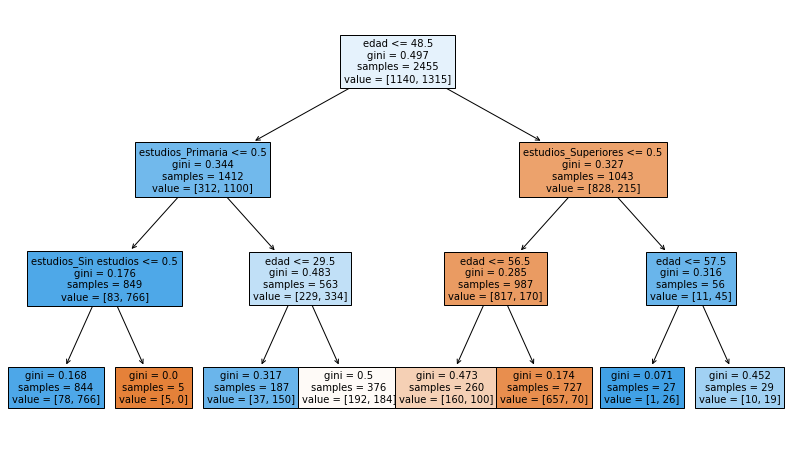

In [104]:
plt.figure(figsize = (14, 8))
plot_tree(decision_tree = modelo_arbol, feature_names = X.columns, filled = True, fontsize = 10);

### Calculamos Prediccion

In [105]:
ejemplo_prediccion = X.sample()

In [106]:
ejemplo_prediccion

,edad,sexo_Mujer,estudios_Medios universitarios,estudios_Primaria,estudios_Secundaria,estudios_Sin estudios,estudios_Superiores
975,49,1,0,1,0,0,0


In [107]:
70/727

0.09628610729023383

In [108]:
# Vamos a usar un poco de probabilidad
modelo_arbol.predict_proba(ejemplo_prediccion)

array([[0.61538462, 0.38461538]])

En la prediccion anterior vemos que el array esta compuesto por dos valores, donde:
   1. El primer valor: 0.90371389 corresponder a la probabilidad de personas que NO usaron internet 
   2. El segundo valor: 0.09628611 corresponde a la probabilidad de personas que SI usaron internet
Esto en base a la edad y estudios de la persona del ejemplo. En este caso una mujer de 63 años de edad con solo estudios de nivel primario

In [109]:
#Calculo de prediciones para todas las perosnas
y_pred = modelo_arbol.predict(X)

### Interpretacion del Modelo 

¿Por que ha determinado la edad como el factor mas influyeten a la hora de decis si una persona usa internet o no?

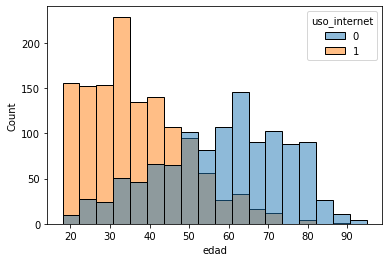

In [110]:
#usaremos un histograma para responder a esta pregunta

import seaborn as sns
sns.histplot(x = df.edad, hue = df.uso_internet);

Entonces en esta grafica de histograma, vemos que hay diferencia enter las personas que han usado internet y las que no, aqui se ve la diferencia entre edades(jovenes y edades mayores)

### ¿Como de bueno es el modelo?

In [111]:
df['pred'] = y_pred

In [112]:
df.sample(20)[['uso_internet', 'pred']]

,uso_internet,pred
2413,0,0
329,0,1
1581,1,0
444,1,1
1431,1,1
2118,1,1
2257,1,1
890,0,1
1054,1,0
1804,1,0


Vemos que hay algunos fallos en la prediccion, entonces procederemos a ver que tanto error tenemos en el modelo a continuacion

In [113]:
#Se muestra la suma de aciertos ente la variable objetivo y la prediccion
# True. = 1, y False = 0 
(df['uso_internet'] == df['pred']).sum()

1975

In [115]:
#porcentaje de aciertos
#la cantiad de personas: 2455
(df['uso_internet'] == df['pred']).sum()/ 2455

0.8044806517311609

Finalmente vemos que el modelo tiene un porcentaje de acierto de 80% aproximadamente